__Unsupervised Learning__: 

Clustering and Dimensionality Reduction

![](http://amueller.github.io/sklearn_tutorial/cheat_sheet.png)

# Clustering

A series of techniques for finding clusters within datasets.

Clusters are groups of points that are closer to each other than to the rest.


[About clustering](https://scikit-learn.org/stable/modules/clustering.html)

__Generate random data__


Generate a random data normally distributed around three centers, with noise. Each cluster will have 200 points. We concatenate all three groups in a single dataframe.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
np.random.seed(7)
centroids = np.random.randn(3,2)
centroids

array([[ 1.6905257 , -0.46593737],
       [ 0.03282016,  0.40751628],
       [-0.78892303,  0.00206557]])

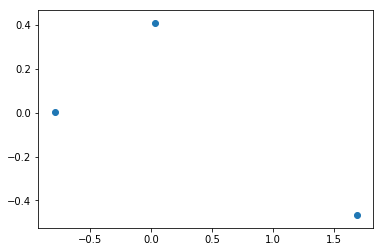

In [6]:
plt.scatter(centroids[:,0], centroids[:,1])

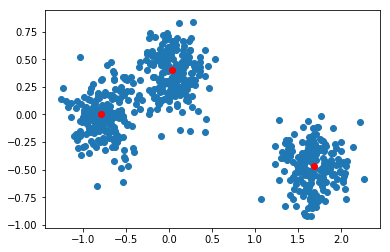

In [7]:
npoints = 200
scale = .2


first_cluster = scale * np.random.randn(npoints, 2) + centroids[0]
second_cluster =  scale * np.random.randn(npoints, 2) + centroids[1]
third_cluster =  scale * np.random.randn(npoints, 2) + centroids[2]

all_points = np.concatenate([first_cluster, second_cluster, third_cluster])
plt.scatter(all_points[:, 0], all_points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], color='red')

Please, note that the data we have created does not have a class. It is just a set of points. However, we DO know that they come from different distribution and our objective is to find out them.

## K-means Clustering

- Throw K candidate cluster centers (_centroids_) randomly at the data.

- Assign points to the closest centroid.

- Update the centroid as the average of its observations.

- Repeat 2,3 until convergence.

__Exercise__ For 3 random starting points, calculate which is the closest for each of our points

In [10]:
from scipy.spatial.distance import cdist

np.random.seed(1213)
starting = np.random.randn(3,2)
starting

array([[ 0.51160368, -0.21766022],
       [-0.52106002,  1.25327036],
       [ 1.10455414, -0.77030869]])

In [14]:
distances = cdist(all_points, starting)
distances.shape

(600, 3)

In [13]:
clusters = np.argmin(distances, axis=1)

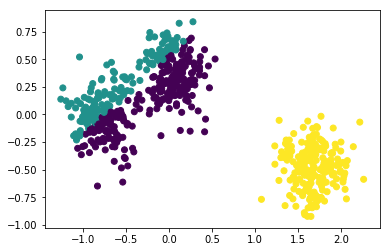

In [16]:
plt.scatter(all_points[:,0], all_points[:,1], c=clusters)

In [17]:
np.mean(all_points[clusters==0], axis=0)

array([-0.20925868,  0.12320672])

In [18]:
new_centroids = np.concatenate([np.mean(all_points[clusters==0], axis = 0),
                                np.mean(all_points[clusters==1], axis = 0),
                                np.mean(all_points[clusters==2], axis = 0)]).reshape(3,2)

new_centroids

array([[-0.20925868,  0.12320672],
       [-0.58313121,  0.26164492],
       [ 1.68098572, -0.47904634]])

array([[-0.20925868,  0.12320672],
       [-0.58313121,  0.26164492],
       [ 1.68098572, -0.47904634]])

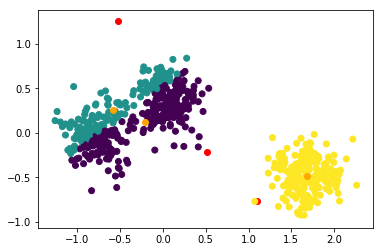

In [19]:
def iterate(all_points, centroids, plot=True):
    # plot old centroids
    if plot:
        plt.scatter(centroids[:, 0], centroids[:, 1] , c = 'red')
    
    
    distances = cdist(all_points, centroids)
    clusters = np.argmin(distances, axis=1) # Columna en la que esta el minimo de distances para cada fila
    
    # update centroids to the center of mass of their assigned points
    new_centroids = np.concatenate([np.mean(all_points[clusters==0], axis = 0),
                                np.mean(all_points[clusters==1], axis = 0),
                                np.mean(all_points[clusters==2], axis = 0)]).reshape(3,2)
    
    if plot:
        plt.scatter(all_points[:, 0], all_points[:, 1], c=clusters)
        plt.scatter(new_centroids[:,0], new_centroids[:, 1], c = 'orange')
        
    return new_centroids, clusters

new_centroids, clusters = iterate(all_points, starting)
new_centroids

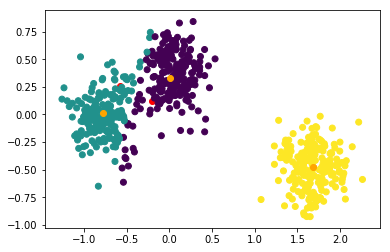

In [20]:
old_centroids, old_clusters = new_centroids, clusters

new_centroids, clusters = iterate(all_points, old_centroids)

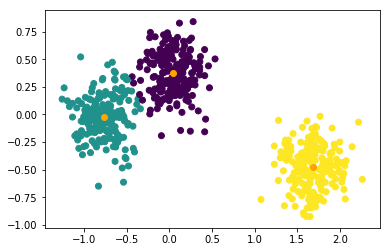

In [21]:
old_centroids, old_clusters = new_centroids, clusters

new_centroids, clusters = iterate(all_points, old_centroids)

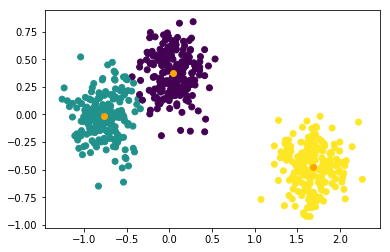

In [22]:
old_centroids, old_clusters = new_centroids, clusters

new_centroids, clusters = iterate(all_points, old_centroids)

Now we are going to compare the original 'cluster' where each point comes from, with the asigned cluster. In order to do that, we just create a vector with the original class (color) and use that to plot. 

Please, recall that this is something we can do here because we're creating a synthetic dataset, but normally we won't be able to do it, since we don't know how the data has been generated.

Notice that class labels (kmeans) may not agree with original class number.

Now let's take some time to play with different number of (original) distributions and clusters and see the effect when number of clusters does not match true data.

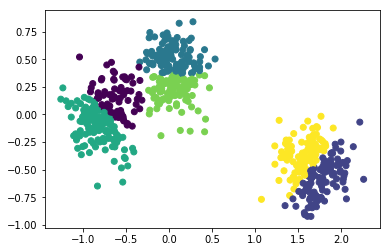

In [26]:
from sklearn.cluster import KMeans

clusterer = KMeans(6) # Notice inconsistency when fitting several times

clusters = clusterer.fit_predict(all_points)
plt.scatter(all_points[:, 0], all_points[:, 1], c=clusters)

### Practical: K-means Clustering with sklearn

In [29]:
df = pd.read_csv('/home/dsc/Downloads/players_20.csv', index_col=0)
pd.options.display.max_columns = None

df = df[df['overall'] > 75]
df.head()

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,

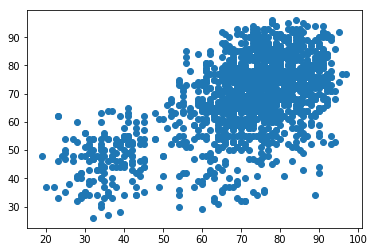

In [30]:
plt.scatter(df['power_stamina'], df['movement_sprint_speed'])

In [31]:
clusters = KMeans(n_clusters=2).fit_predict(df[['power_stamina', 'movement_sprint_speed']])
clusters

array([0, 0, 0, ..., 0, 1, 0], dtype=int32)

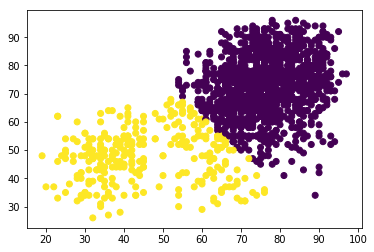

In [32]:
plt.scatter(df['power_stamina'], df['movement_sprint_speed'], c=clusters)

### The elbow method

Criteria to choose a number of clusters in Kmeans

In [33]:
distances = cdist(all_points, clusterer.cluster_centers_)
np.min(distances, axis=1).mean()

0.19249026267988126

CPU times: user 2.11 s, sys: 30.8 ms, total: 2.14 s
Wall time: 845 ms


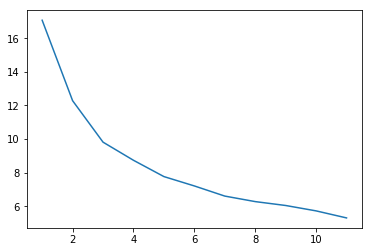

In [34]:
%%time

clusterings = []
scores = []

for n_clusters in range(1, 12):
    
    this_one = KMeans(n_clusters=n_clusters)
    clusters = this_one.fit_predict(df[['power_stamina', 'movement_sprint_speed']])
    
    distances = cdist(df[['power_stamina', 'movement_sprint_speed']], this_one.cluster_centers_)
    score = np.min(distances, axis=1).mean()
    
    clusterings.append(this_one)
    scores.append(score)
    
plt.plot(range(1, 12), scores)

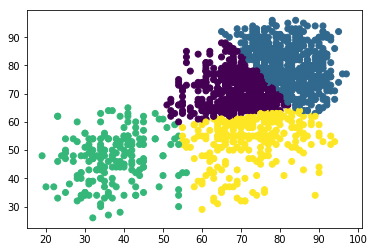

In [35]:
plt.scatter(df['power_stamina'], df['movement_sprint_speed'], c=clusterings[3].labels_)

## Hierarchical clustering

Instead of subdividing the observations, we join those that are similar to each other.

We can track the order in which we join them up and represent it as a _dendrogram_.

We don't need to specify the number of clusters beforehand.

![](https://i0.wp.com/datascienceplus.com/wp-content/uploads/2016/01/hclust.png)

### Distance measures in clustering

In any of these approaches, we need a measure of distance or similarity between points. 

In hierarchical clustering, we additionally need a measure of similarity between single points and groups of points.

How will this measures be influenced by the scale of our variables?

### Clustering in scikit-learn

![](http://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png)

### DBSCAN

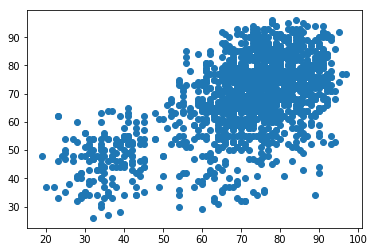

In [38]:
two_columns = df[['power_stamina', 'movement_sprint_speed']]

plt.scatter(two_columns['power_stamina'],
            two_columns['movement_sprint_speed'])

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22]),
 array([1483,    6,    6,    5,    7,    5,    6,    5,    5,    5,    5,
           5,    8,    5,    5,    5,    6,   10,    5,    6,    7,    5,
           5,    5]))

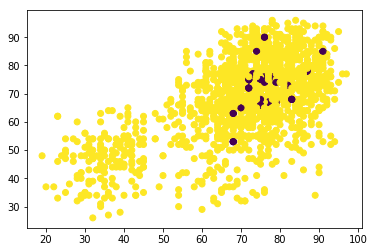

In [39]:
from sklearn.cluster import DBSCAN

labels = DBSCAN(eps=0.5).fit_predict(two_columns)
plt.scatter(two_columns['power_stamina'], two_columns['movement_sprint_speed'], 
           c = labels==-1)

np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 array([ 185, 1279,   89,    5,    5,    4,    6,    7,    7,    5,    5,
           6,    5,    3,    4]))

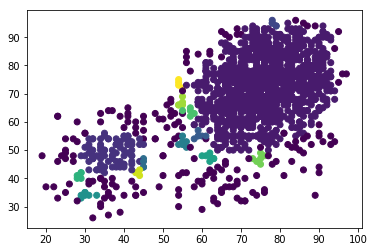

In [40]:
from sklearn.cluster import DBSCAN

labels = DBSCAN(eps=2).fit_predict(two_columns)
plt.scatter(two_columns['power_stamina'], two_columns['movement_sprint_speed'], 
           c = labels)

np.unique(labels, return_counts=True)

array([-1,  0,  1,  2,  3,  4])

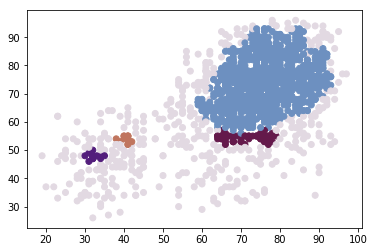

In [41]:
from sklearn.cluster import DBSCAN

labels = DBSCAN(eps=2, min_samples=10).fit_predict(two_columns)
plt.scatter(two_columns['power_stamina'], two_columns['movement_sprint_speed'], 
           c = labels, cmap='twilight')

np.unique(labels)

array([-1,  0,  1,  2,  3])

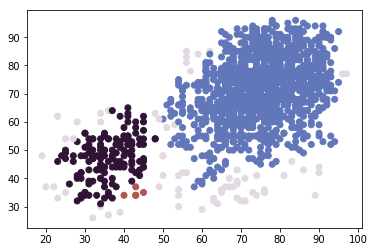

In [42]:
from sklearn.cluster import DBSCAN

labels = DBSCAN(eps=3).fit_predict(two_columns)
plt.scatter(two_columns['power_stamina'], two_columns['movement_sprint_speed'], 
           c = labels, cmap='twilight')

np.unique(labels)

In [46]:
fewer = labels[2:] == -1
df[labels == -1].head()

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
215914,https://sofifa.com/player/215914/ngolo-kante/2...,N. Kanté,N'Golo Kanté,28,1991-03-29,168,72,France,Chelsea,89,90,66000000,235000,"CDM, CM",Right,3,3,2,Medium/High,Normal,Yes,130400000.0,"#Tackling , #Tactician",RCM,7.0,NaN,2016-07-16,2023.0,LDM,13.0,78.0,65.0,77.0,81.0,87.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,Diver,68,65,54,86,56,79,49,49,81,80,79,77,82,93,92,71,77,97,73,63,90,92,72,79,54,85,90,91,85,15,12,10,7,10,72+3,72+3,72+3,77+3,76+3,76+3,76+3,77+3,78+3,78+3,78+3,79+3,82+3,82+3,82+3,79+3,85+3,87+3,87+3,87+3,85+3,84+3,83+3,83+3,83+3,84+3
189511,https://sofifa.com/player/189511/sergio-busque...,Sergio Busquets,Sergio Busquets i Burgos,30,1988-07-16,189,76,Spain,FC Barcelona,89,89,55000000,300000,"CDM, CM",Right,4,3,3,Medium/Medium,Lean,Yes,112800000.0,"#Playmaker , #Tactician",CDM,5.0,NaN,2008-09-01,2023.0,CDM,5.0,42.0,62.0,80.0,80.0,85.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,Giant Throw-in,62,67,68,89,44,80,66,68,82,88,40,43,67,87,49,61,66,86,77,54,85,89,77,86,60,93,90,86,80,5,8,13,9,13,70+3,70+3,70+3,73+3,75+3,75+3,75+3,73+3,78+3,78+3,78+3,75+3,83+3,83+3,83+3,75+3,78+3,86+3,86+3,86+3,78+3,78+3,82+3,82+3,82+3,78+3
182521,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,88,88,57000000,330000,CM,Right,4,5,3,Medium/Medium,Normal,Yes,116900000.0,"#Playmaker , #Crosser, #Complete Midfielder",LCM,8.0,NaN,2014-07-17,2023.0,SUB,8.0,45.0,80.0,90.0,81.0,70.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,"Argues with Officials, Finesse Shot, Crowd Fav...",88,75,58,91,82,80,86,84,92,89,50,41,60,87,71,87,30,74,73,86,60,76,75,89,73,88,72,70,62,10,11,13,7,10,75+3,75+3,75+3,78+3,79+3,79+3,79+3,78+3,81+3,81+3,81+3,79+3,85+3,85+3,85+3,79+3,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
189513,https://sofifa.com/player/189513/daniel-parejo...,Parejo,Daniel Parejo Muñoz,30,1989-04-16,182,74,Spain,Valencia CF,86,86,41000000,69000,CM,Right,2,4,3,Medium/Medium,Lean,Yes,86100000.0,"#Playmaker , #FK Specialist, #Complete Midfie...",RCM,10.0,NaN,2011-07-01,2022.0,NaN,NaN,41.0,80.0,88.0,79.0,70.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Leadership, Finesse Shot",84,80,61,91,72,79,89,90,88,85,49,35,64,78,72,79,49,76,71,82,58,81,81,86,83,85,69,68,65,5,9,12,14,8,74+2,74+2,74+2,76+2,77+2,77+2,77+2,76+2,80+2,80+2,80+2,77+2,83+2,83+2,83+2,77+2,74+2,78+2,78+2,78+2,74+2,71+2,69+2,69+2,69+2,71+2
199482,https://sofifa.com/player/199482/anthony-lopes...,A. Lopes,Anthony Lopes,28,1990-10-01,184,81,Portugal,Olympique Lyonnais,85,87,33500000,88000,GK,Left,2,2,1,Medium/Medium,Normal,Yes,66200000.0,NaN,GK,1.0,NaN,2011-07-01,2020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,80.0,75.0,89.0,64.0,84.0,

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56])

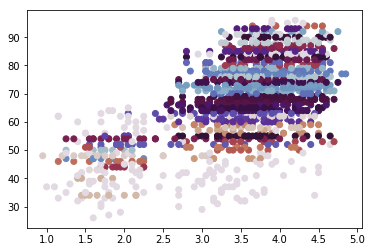

In [47]:
from sklearn.cluster import DBSCAN

aplastado = two_columns['power_stamina'] / 20
no_aplastado = two_columns['movement_sprint_speed']
together = pd.concat([aplastado, no_aplastado], axis=1)


labels = DBSCAN().fit_predict(together)
plt.scatter(together['power_stamina'], together['movement_sprint_speed'], 
           c = labels, cmap='twilight')

np.unique(labels)

## Quality of clustering

### The elbow method

Already see

### Silhouette

[Selecting the number of clusters with silhouette analysis on KMeans clustering](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [52]:
clusterings[0]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [53]:
from sklearn.metrics import silhouette_score, silhouette_samples


for clustering in clusterings[1:]:
    score = silhouette_score(two_columns, clustering.labels_)
    n = clustering.n_clusters
    print('La puntuacion del clustering con %d clusters es %f' % (n, score))

La puntuacion del clustering con 2 clusters es 0.571017
La puntuacion del clustering con 3 clusters es 0.397707
La puntuacion del clustering con 4 clusters es 0.354317
La puntuacion del clustering con 5 clusters es 0.362118
La puntuacion del clustering con 6 clusters es 0.348688
La puntuacion del clustering con 7 clusters es 0.365762
La puntuacion del clustering con 8 clusters es 0.358075
La puntuacion del clustering con 9 clusters es 0.338044
La puntuacion del clustering con 10 clusters es 0.331878
La puntuacion del clustering con 11 clusters es 0.352003


# Dimensionality reduction

## Principal Component Analysis (PCA)

A dimensionality reduction technique

![](https://intoli.com/blog/pca-and-svd/img/basic-pca.png)

Applying PCA to the dataset

In [54]:
df.columns[df.dtypes==np.int64]

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_re

In [55]:
from sklearn.decomposition import PCA

pca = PCA()

only_ints = df[df.columns[df.dtypes==np.int64]]
new = pca.fit_transform(only_ints)

new.shape, only_ints.shape

((1615, 44), (1615, 44))

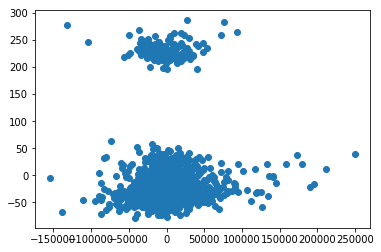

In [56]:
plt.scatter(new[:, 1], new[:, 2])

<BarContainer object of 44 artists>

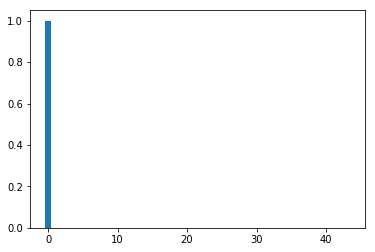

In [57]:
plt.bar(range(44), pca.explained_variance_ratio_)

In [58]:
pca.components_[0]

array([-8.75249785e-08, -2.02903619e-08, -2.66756256e-08,  2.13980598e-07,
        2.45950160e-07,  9.99994592e-01,  3.28889595e-03,  2.98416582e-08,
        8.60968969e-09,  1.48814751e-08,  2.64207983e-07,  3.55055240e-07,
        7.39763694e-08,  2.73578082e-07,  3.14610150e-07,  3.31078539e-07,
        3.10006491e-07,  2.66691388e-07,  2.46990205e-07,  3.14463218e-07,
        2.73258296e-07,  2.78088620e-07,  2.51583990e-07,  2.41847109e-07,
        2.09200795e-07,  1.89202549e-07,  1.86643443e-08,  2.27079643e-07,
       -1.65598651e-09,  2.88418566e-07, -2.84253988e-08, -2.18598293e-08,
        3.44851460e-07,  3.10962697e-07,  2.05177321e-07,  2.50188825e-07,
        1.54259868e-08, -3.29660202e-08, -7.19875604e-08, -8.56674382e-08,
       -7.62260198e-08, -7.65508966e-08, -8.26218397e-08, -7.73420772e-08])

In [59]:
list(zip(only_ints.columns, pca.components_[0]))

[('age', -8.75249785353847e-08),
 ('height_cm', -2.029036194617362e-08),
 ('weight_kg', -2.6675625596665185e-08),
 ('overall', 2.1398059801931406e-07),
 ('potential', 2.459501603206995e-07),
 ('value_eur', 0.9999945915661959),
 ('wage_eur', 0.003288895951538814),
 ('international_reputation', 2.98416582386521e-08),
 ('weak_foot', 8.609689691824454e-09),
 ('skill_moves', 1.4881475067740052e-08),
 ('attacking_crossing', 2.642079828173703e-07),
 ('attacking_finishing', 3.5505523978850894e-07),
 ('attacking_heading_accuracy', 7.397636939985118e-08),
 ('attacking_short_passing', 2.735780815128179e-07),
 ('attacking_volleys', 3.146101498497798e-07),
 ('skill_dribbling', 3.3107853943259176e-07),
 ('skill_curve', 3.1000649064499926e-07),
 ('skill_fk_accuracy', 2.6669138817817404e-07),
 ('skill_long_passing', 2.469902050785285e-07),
 ('skill_ball_control', 3.144632179985039e-07),
 ('movement_acceleration', 2.732582960130673e-07),
 ('movement_sprint_speed', 2.780886195007219e-07),
 ('movement_ag

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized = scaler.fit_transform(only_ints)
factorized = pca.fit_transform(standardized)

pca.explained_variance_ratio_

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([4.59980226e-01, 1.46894933e-01, 9.47986326e-02, 6.19976258e-02,
       4.38579262e-02, 3.03952530e-02, 1.89259591e-02, 1.65260530e-02,
       1.38627457e-02, 1.20074173e-02, 9.84360457e-03, 7.98642591e-03,
       7.55679702e-03, 6.64695988e-03, 5.61882445e-03, 5.56323687e-03,
       5.16320620e-03, 4.71242729e-03, 4.29031289e-03, 4.08483759e-03,
       3.83043446e-03, 3.50134361e-03, 3.13198823e-03, 2.86486450e-03,
       2.68019544e-03, 2.44511007e-03, 2.28851301e-03, 2.18423939e-03,
       1.96453979e-03, 1.86657507e-03, 1.72361931e-03, 1.60898684e-03,
       1.30107104e-03, 1.22541423e-03, 1.00977657e-03, 9.95798517e-04,
       9.25515431e-04, 8.52140015e-04, 6.32746769e-04, 4.96934497e-04,
       4.76662640e-04, 4.49059289e-04, 4.35884024e-04, 3.95183351e-04])

In [61]:
sorted(zip(only_ints.columns, pca.components_[0]), key=lambda t: - abs(t[1]))

[('skill_ball_control', -0.21650506887234394),
 ('skill_dribbling', -0.21510410267894006),
 ('attacking_short_passing', -0.20758238107246513),
 ('attacking_crossing', -0.20089414465914912),
 ('skill_curve', -0.1995746276537686),
 ('mentality_positioning', -0.19955348499478648),
 ('goalkeeping_reflexes', 0.19902142531790995),
 ('goalkeeping_positioning', 0.19885328091450744),
 ('goalkeeping_diving', 0.1987167631175592),
 ('power_long_shots', -0.198283296771518),
 ('goalkeeping_handling', 0.19820069209129249),
 ('goalkeeping_kicking', 0.19664603786160126),
 ('attacking_volleys', -0.18592948881852642),
 ('attacking_finishing', -0.18582626947316366),
 ('skill_moves', -0.18564158140865267),
 ('power_stamina', -0.18244513771645712),
 ('skill_fk_accuracy', -0.1819369006238643),
 ('skill_long_passing', -0.1783850269276267),
 ('mentality_penalties', -0.17766377129355823),
 ('mentality_composure', -0.16485052999496858),
 ('mentality_vision', -0.15753223954470613),
 ('movement_balance', -0.156841

In [62]:
sorted(zip(only_ints.columns, pca.components_[1]), key=lambda t: - abs(t[1]))

[('defending_sliding_tackle', -0.32178758728682183),
 ('defending_standing_tackle', -0.32008032497632316),
 ('mentality_interceptions', -0.31396815803209444),
 ('defending_marking', -0.3107909123805696),
 ('mentality_aggression', -0.2726462629358963),
 ('power_strength', -0.2446782826608197),
 ('attacking_heading_accuracy', -0.22708322534408454),
 ('movement_agility', 0.18963669504371866),
 ('mentality_vision', 0.15178796410287532),
 ('height_cm', -0.15109910407815538),
 ('movement_balance', 0.14752383166298907),
 ('movement_acceleration', 0.1439877547614274),
 ('weight_kg', -0.13453943381254468),
 ('goalkeeping_handling', 0.13283829141208597),
 ('goalkeeping_kicking', 0.13227589642557813),
 ('goalkeeping_reflexes', 0.13119525272988336),
 ('goalkeeping_diving', 0.13036216850349205),
 ('skill_moves', 0.1298457448623776),
 ('goalkeeping_positioning', 0.12781258223480954),
 ('attacking_finishing', 0.12664315939359955),
 ('power_jumping', -0.12336780838851819),
 ('attacking_volleys', 0.114

In [63]:
sorted(zip(only_ints.columns, pca.components_[2]), key=lambda t: - abs(t[1]))

[('overall', 0.4484788754655105),
 ('value_eur', 0.41307358739636274),
 ('wage_eur', 0.3893087991199183),
 ('potential', 0.3544274595557546),
 ('movement_reactions', 0.34889308060515034),
 ('international_reputation', 0.3027202525357254),
 ('mentality_composure', 0.1638589551692912),
 ('height_cm', 0.13141619737694432),
 ('power_strength', 0.12771270344695848),
 ('weight_kg', 0.12656817417839086),
 ('power_jumping', 0.08016887667697731),
 ('movement_balance', -0.0679995598447343),
 ('goalkeeping_reflexes', 0.05739342670473248),
 ('defending_marking', 0.05724094245370987),
 ('goalkeeping_positioning', 0.05680093731533649),
 ('mentality_interceptions', 0.056549559473695006),
 ('goalkeeping_handling', 0.056517854353425614),
 ('skill_moves', -0.05563389897302129),
 ('goalkeeping_diving', 0.054599883358336106),
 ('goalkeeping_kicking', 0.05374128281035964),
 ('movement_agility', -0.05128830965360924),
 ('skill_long_passing', 0.050427517597647346),
 ('mentality_vision', 0.04689641241300907),

In [64]:
np.argmax(factorized, axis=1)[:10]

array([2, 2, 2, 0, 2, 2, 0, 2, 2, 2])

In [65]:
df.iloc[2]

player_url    https://sofifa.com/player/190871/neymar-da-sil...
short_name                                            Neymar Jr
long_name                         Neymar da Silva Santos Junior
age                                                          27
dob                                                  1992-02-05
                                    ...                        
lb                                                         61+3
lcb                                                        46+3
cb                                                         46+3
rcb                                                        46+3
rb                                                         61+3
Name: 190871, Length: 103, dtype: object

<BarContainer object of 44 artists>

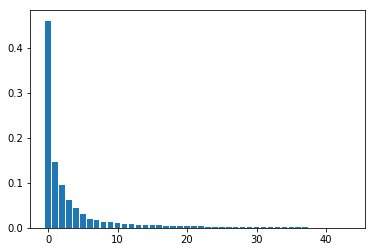

In [66]:
plt.bar(range(44), pca.explained_variance_ratio_)

More links

[Kernel Trick](http://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick.html)

[Kagge notebook on Costumer Segmentation](https://www.kaggle.com/fabiendaniel/customer-segmentation)